In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import seaborn as sns

In [69]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Parte 1 - Análise exploratória dos dados

## 1.1 - Carregue o conjunto de dados

In [5]:
data = pd.read_feather("traffic_data.feather")

In [6]:
del data['index']

In [7]:
data

,passage,direction,type,region,timestamp,jam_size,segment
0,"Jânio Quadros, Túnel",unico//,NaN,OESTE,2015-01-04 14:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
1,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,SUL,2015-01-04 14:30:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...
2,"Jânio Quadros, Túnel",unico//,NaN,OESTE,2015-01-04 15:00:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
3,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,SUL,2015-01-04 15:00:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...
4,"Jânio Quadros, Túnel",unico//,NaN,OESTE,2015-01-04 15:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
...,...,...,...,...,...,...,...
5223443,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,2018-09-30 18:30:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223444,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,2018-09-30 19:00:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...
5223445,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,2018-09-30 19:00:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223446,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,2018-09-30 19:30:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...


## 1.2 - Dados Nulos/Faltantes

In [8]:
#Calculando a quantidade de dados faltantes por coluna
num_missing = data.isnull().sum()
num_missing

passage            0
direction          0
type         3323735
region       2509341
timestamp          0
jam_size           0
segment            0
dtype: int64

In [9]:
#Valor percentual de dados faltantes
percentual_missing = (num_missing / len(data['type']))*100
percentual_missing

passage       0.000000
direction     0.000000
type         63.631054
region       48.039935
timestamp     0.000000
jam_size      0.000000
segment       0.000000
dtype: float64

In [10]:
#Resumo
num_missing_type = data['type'].isnull().sum()
num_missing_region = data['region'].isnull().sum()

print ("Quantidade de dados faltantes na coluna type é: %d" %num_missing_type)
print ("Quantidade de dados faltantes na coluna region é: %d" %num_missing_region)

Quantidade de dados faltantes na coluna type é: 3323735
Quantidade de dados faltantes na coluna region é: 2509341


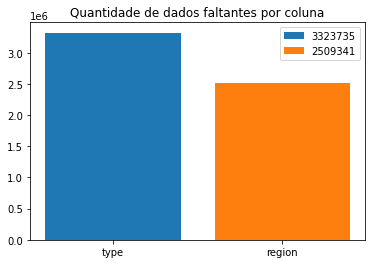

In [11]:
#Relação de dados faltantes por coluna
mp.bar('type',num_missing_type, label = num_missing_type)
mp.bar('region',num_missing_region, label = num_missing_region)
mp.title("Quantidade de dados faltantes por coluna")
mp.legend()
mp.show()

In [12]:
#Resolução de dados faltantes
#Tentantiva - exclusão de linhas com dados faltantes
data_srows = data.dropna()
data_srows

,passage,direction,type,region,timestamp,jam_size,segment
8,Marginal Tietê,A.Senna/Castelo Branco,E,LESTE,2015-01-05 07:00:00,4109,De 791 m antes de TATUAPE até IMIGRANTE NORDE...
10,Marginal Tietê,A.Senna/Castelo Branco,A,LESTE,2015-01-05 07:00:00,2137,De 763 m antes de TATUAPE até ARICANDUVA
14,Marginal Tietê,A.Senna/Castelo Branco,E,LESTE,2015-01-05 07:30:00,4168,De 732 m antes de TATUAPE até IMIGRANTE NORDE...
17,Marginal Tietê,A.Senna/Castelo Branco,A,LESTE,2015-01-05 07:30:00,2192,De 708 m antes de TATUAPE até ARICANDUVA
18,Radial Leste - DEC MO,Bairro/Centro,E,CENTRO,2015-01-05 07:30:00,800,De ALVARO RAMOS Metro Belem até PIRES DO RIO ...
...,...,...,...,...,...,...,...
5223443,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,2018-09-30 18:30:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223444,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,2018-09-30 19:00:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...
5223445,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,2018-09-30 19:00:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223446,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,2018-09-30 19:30:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...


In [14]:
#Tentantiva - exclusão de colunas com dados faltantes
data_scol = data.dropna(axis=1)
data_scol

,passage,direction,timestamp,jam_size,segment
0,"Jânio Quadros, Túnel",unico//,2015-01-04 14:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
1,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,2015-01-04 14:30:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...
2,"Jânio Quadros, Túnel",unico//,2015-01-04 15:00:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
3,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,2015-01-04 15:00:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...
4,"Jânio Quadros, Túnel",unico//,2015-01-04 15:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
...,...,...,...,...,...
5223443,Marginal Pinheiros,Interlagos/Castelo,2018-09-30 18:30:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223444,Marginal Pinheiros,Interlagos/Castelo,2018-09-30 19:00:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...
5223445,Marginal Pinheiros,Interlagos/Castelo,2018-09-30 19:00:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223446,Marginal Pinheiros,Interlagos/Castelo,2018-09-30 19:30:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...


In [15]:
#Tentantiva - substituição pela moda
data.fillna(data.mode().squeeze())

,passage,direction,type,region,timestamp,jam_size,segment
0,"Jânio Quadros, Túnel",unico//,E,OESTE,2015-01-04 14:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
1,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,E,SUL,2015-01-04 14:30:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...
2,"Jânio Quadros, Túnel",unico//,E,OESTE,2015-01-04 15:00:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
3,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,E,SUL,2015-01-04 15:00:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...
4,"Jânio Quadros, Túnel",unico//,E,OESTE,2015-01-04 15:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
...,...,...,...,...,...,...,...
5223443,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,2018-09-30 18:30:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223444,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,2018-09-30 19:00:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...
5223445,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,2018-09-30 19:00:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223446,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,2018-09-30 19:30:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...


In [16]:
#Tentativa - substituição dos dados da coluna region por valores que mais se repetem. cujo foi a tentativa adotava para a substituição dos dados faltantes,
#e determinei a exclusão da coluna type, pois não será de tanta relevância.
#se utilizássemos a exclusão dos registros por linha teríamos uma perda de 88,69% dos dados, se excluíssemos a coluna region
#comprometeríamos algumas atividades futuras, como o desempenho do classificador. Não utilizamos a moda para a substituição porque não haverá efeito.

#verificando qual valor mais se repete na coluna region
freq_region = data['region'].value_counts().idxmax()
print(freq_region)
#excluindo a coluna type
data = data.drop(columns=['type'])

CENTRO


In [17]:
#Subsituindo dados faltantes pelo valor que mais se repete na coluna
data['region'].fillna(freq_region,inplace=True)
data

,passage,direction,region,timestamp,jam_size,segment
0,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 14:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
1,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,SUL,2015-01-04 14:30:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...
2,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 15:00:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
3,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,SUL,2015-01-04 15:00:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...
4,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 15:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
...,...,...,...,...,...,...
5223443,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 18:30:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223444,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 19:00:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...
5223445,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 19:00:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223446,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 19:30:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...


In [18]:
data.isnull().sum()

passage      0
direction    0
region       0
timestamp    0
jam_size     0
segment      0
dtype: int64

## 1.3 - Dados Categóricos

In [19]:
#verificando as possibilidades de preenchimento da coluna region
data['region'].value_counts()

CENTRO    3320935
OESTE      732056
SUL        621874
LESTE      410407
NORTE      138176
Name: region, dtype: int64

In [22]:
#utilizamos o encoder para não considerar os dados numéricos privilegiados comparando com os demais,
#criamos uma nova coluna para expressar essar representação, essa coluna representa a coluna region em forma numérica
labelencoder = LabelEncoder ()

data['region']= data['region'].astype('category')
data['region_target']=data['region'].replace(['CENTRO','OESTE','SUL','LESTE','NORTE'],[0,1,2,3,4])
data['region_target'] = labelencoder.fit_transform (data['region']) 
data.head(50)

,passage,direction,region,timestamp,jam_size,segment,region_target
0,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 14:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,3
1,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,SUL,2015-01-04 14:30:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...,4
2,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 15:00:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,3
3,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,SUL,2015-01-04 15:00:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...,4
4,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 15:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,3
5,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,SUL,2015-01-04 15:30:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...,4
6,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 16:00:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,3
7,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,SUL,2015-01-04 16:00:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...,4
8,Marginal Tietê,A.Senna/Castelo Branco,LESTE,2015-01-05 07:00:00,4109,De 791 m antes de TATUAPE até IMIGRANTE NORDE...,1
9,"Aricanduva, Av/Elev/Pt",Itaquera/Marginal,LESTE,2015-01-05 07:00:00,3250,De ARICANDUVA Término até MORAVIA oposto,1


 ## 1.3 - Correlação

In [20]:
correlation = data.corr()
correlation

,jam_size,region_target
jam_size,1.000000,-0.067438
region_target,-0.067438,1.000000


<AxesSubplot:>

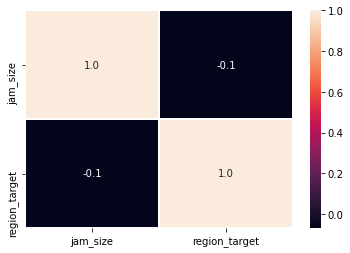

In [21]:
#Há uma corelação negativa entre as variáveis
correlation_also = sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=.6)
correlation_also

## 1.5 - Análise de Engarrafamentos

In [23]:
agrup_ano = data.groupby(data['timestamp'].dt.year)['jam_size'].sum()
agrup_ano

timestamp
2001    337317455
2002    290727461
2003    302719750
2004    412822965
2005    414207497
2006    441722389
2007    491195181
2008    531900345
2009    489174295
2010    405757678
2011    356087038
2012    451355689
2013    503929366
2014    547060674
2015    481336019
2016    424815543
2017    393054774
2018    317251510
Name: jam_size, dtype: int64

Text(0.5, 1.0, 'Distribuição dos engarrafamentos por ano')

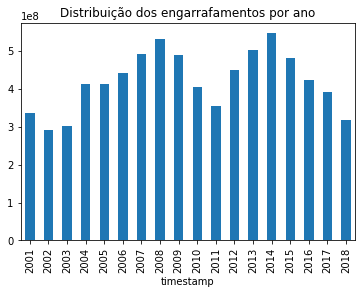

In [24]:
data.groupby(data['timestamp'].dt.year)['jam_size'].sum().plot.bar()
mp.title("Distribuição dos engarrafamentos por ano")

In [25]:
agrup_mes = data.groupby(data['timestamp'].dt.month)['jam_size'].sum()
agrup_mes

timestamp
1     410139614
2     550526338
3     731897654
4     677629901
5     671866211
6     624693813
7     516405308
8     720638696
9     687137795
10    676916007
11    682404447
12    642179845
Name: jam_size, dtype: int64

Text(0.5, 1.0, 'Distribuição dos engarrafamentos por mês')

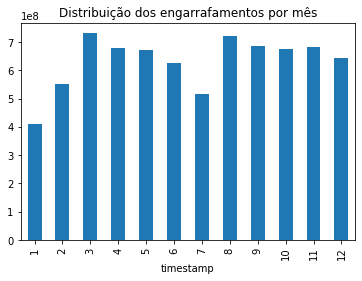

In [26]:
data.groupby(data['timestamp'].dt.month)['jam_size'].sum().plot.bar()
mp.title("Distribuição dos engarrafamentos por mês")

In [27]:
agrup_dia = data.groupby(data['timestamp'].dt.day)['jam_size'].sum()
agrup_dia

timestamp
1     216677089
2     214502006
3     239701614
4     246681951
5     257991306
6     272120701
7     238880754
8     271081141
9     240100999
10    264850365
11    270051808
12    250005677
13    266017764
14    270186119
15    242713094
16    259935936
17    275230134
18    266885444
19    268614098
20    247914122
21    237389770
22    246414818
23    253420122
24    243387992
25    227947384
26    249465157
27    248414958
28    244762221
29    220196366
30    213630504
31    127264215
Name: jam_size, dtype: int64

Text(0.5, 1.0, 'Distribuição dos engarrafamentos por dia')

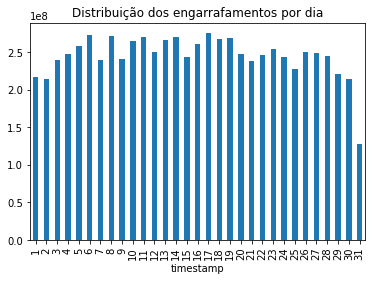

In [28]:
data.groupby(data['timestamp'].dt.day)['jam_size'].sum().plot.bar()
mp.title("Distribuição dos engarrafamentos por dia")

In [29]:
agrup_hora = data.groupby(data['timestamp'].dt.time)['jam_size'].sum()
agrup_hora

timestamp
00:00:00      6509708
00:30:00      2862860
01:00:00      2274911
01:30:00      1784782
02:00:00      1476929
02:30:00      1235934
03:00:00      1079260
03:30:00       935404
04:00:00       828230
04:30:00       735991
05:00:00       751012
05:30:00       721448
06:00:00      2376725
06:30:00     23256481
07:00:00     98583652
07:30:00    180596413
08:00:00    261830983
08:30:00    308163736
09:00:00    338971351
09:30:00    326457598
10:00:00    276105609
10:30:00    250924024
11:00:00    238390060
11:30:00    219080639
12:00:00    193934054
12:30:00    175978519
13:00:00    164802511
13:30:00    150066353
14:00:00    151573466
14:30:00    157520544
15:00:00    173851603
15:30:00    187965346
16:00:00    213419165
16:30:00    251938448
17:00:00    317738432
17:30:00    349640032
18:00:00    400831883
18:30:00    461002869
19:00:00    504125733
19:30:00    443833608
20:00:00    288958830
20:30:00    209895975
21:00:00    117945826
21:30:00     64830324
22:00:00     32585413


Text(0.5, 1.0, 'Distribuição dos engarrafamentos por hora')

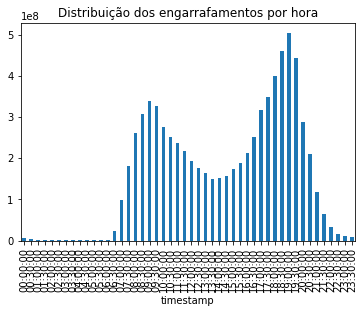

In [29]:
#Podemos constatar que há grande engarrafamento a partir das 7:30h, há um tendência descendente, e logo mais a 
#taxa de engarrafamento volta a subir, principalmente, no início da noite, por volta das 18h, e depois tende a cair.
data.groupby(data['timestamp'].dt.time)['jam_size'].sum().plot.bar()
mp.title("Distribuição dos engarrafamentos por hora")

# Atividade-proativa (modelo de regressão linear)

In [31]:
#Criei uma nova coluna para armazenar consigo o horário do engarrafamento
data['hora']=data["timestamp"].dt.hour
data

,passage,direction,region,timestamp,jam_size,segment,region_target,hora
0,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 14:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,3,14
1,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,SUL,2015-01-04 14:30:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...,4,14
2,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 15:00:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,3,15
3,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,SUL,2015-01-04 15:00:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...,4,15
4,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 15:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,3,15
...,...,...,...,...,...,...,...,...
5223443,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 18:30:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,3,18
5223444,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 19:00:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,3,19
5223445,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 19:00:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,3,19
5223446,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 19:30:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,3,19


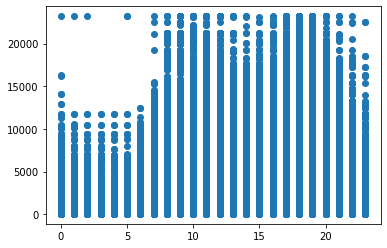

In [32]:
mp.scatter(data['hora'],data['jam_size'])

In [33]:
reg_linear=linear_model.LinearRegression()
treino = reg_linear.fit(data[['hora']],data[['jam_size']])

In [35]:
#determinação da reta de regressão
treino.coef_
treino.intercept_
print(treino.coef_)
print(treino.intercept_)
print("A reta do modelo é representada por y={}+{}x".format(treino.intercept_,treino.coef_))

[[18.69020601]]
[1190.05791121]
A reta do modelo é representada por y=[1190.05791121]+[[18.69020601]]x


In [38]:
#O modelo não é eficiente, pois o coeficiente de determinação não está na faixa mínima ideial. Porém achei interessante a 
#criação/demonstração para fins didáticos
treino.score(data[['hora']],data[['jam_size']])

0.002637253904186898

In [39]:
#Prevendo um valor
valor1 = [[20]]
treino.predict(valor1)

array([[1563.8620314]])

# Parte 2 - Predição de engarrafamento

In [41]:
#Dividi os dados em treino (33%) e teste, e separei as variáveis dependentes e independentes
features =data[['region_target','timestamp']]

train, test, train_labels, test_labels = train_test_split(features,
                                                          data['jam_size'],
                                                          test_size=0.33,
                                                          random_state=42)

In [33]:
gnb = GaussianNB()
model = gnb.fit(train, train_labels)

In [42]:
#Não foi possível realizar essa etapa, pois o processamento foi comprometido, foram realizadas diversas tentativas, porém,
#sem êxito
#preds = gnb.predict(test)

In [43]:
#print(accuracy_score(test_labels, preds))

# Extra (Opcional)

In [44]:
data

,passage,direction,region,timestamp,jam_size,segment,region_target,hora
0,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 14:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,3,14
1,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,SUL,2015-01-04 14:30:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...,4,14
2,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 15:00:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,3,15
3,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,SUL,2015-01-04 15:00:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...,4,15
4,"Jânio Quadros, Túnel",unico//,OESTE,2015-01-04 15:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,3,15
...,...,...,...,...,...,...,...,...
5223443,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 18:30:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,3,18
5223444,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 19:00:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,3,19
5223445,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 19:00:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...,3,19
5223446,Marginal Pinheiros,Interlagos/Castelo,OESTE,2018-09-30 19:30:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...,3,19


In [46]:
new = data["passage"].str.split(",", n=1, expand=True)
new = pd.DataFrame(new)

In [47]:
new

,0,1
0,Jânio Quadros,Túnel
1,Juscelino Kubitschek,Av Pres
2,Jânio Quadros,Túnel
3,Juscelino Kubitschek,Av Pres
4,Jânio Quadros,Túnel
...,...,...
5223443,Marginal Pinheiros,None
5223444,Marginal Pinheiros,None
5223445,Marginal Pinheiros,None
5223446,Marginal Pinheiros,None


In [49]:
new['address']=new[1] + " " + new[0]
new

,0,1,address
0,Jânio Quadros,Túnel,Túnel Jânio Quadros
1,Juscelino Kubitschek,Av Pres,Av Pres Juscelino Kubitschek
2,Jânio Quadros,Túnel,Túnel Jânio Quadros
3,Juscelino Kubitschek,Av Pres,Av Pres Juscelino Kubitschek
4,Jânio Quadros,Túnel,Túnel Jânio Quadros
...,...,...,...
5223443,Marginal Pinheiros,None,NaN
5223444,Marginal Pinheiros,None,NaN
5223445,Marginal Pinheiros,None,NaN
5223446,Marginal Pinheiros,None,NaN


In [50]:
new.update(new['address'].fillna(0))
new

,0,1,address
0,Jânio Quadros,Túnel,Túnel Jânio Quadros
1,Juscelino Kubitschek,Av Pres,Av Pres Juscelino Kubitschek
2,Jânio Quadros,Túnel,Túnel Jânio Quadros
3,Juscelino Kubitschek,Av Pres,Av Pres Juscelino Kubitschek
4,Jânio Quadros,Túnel,Túnel Jânio Quadros
...,...,...,...
5223443,Marginal Pinheiros,None,0
5223444,Marginal Pinheiros,None,0
5223445,Marginal Pinheiros,None,0
5223446,Marginal Pinheiros,None,0


In [51]:
new.loc[new['address']==0,'address']=new[0]
new

,0,1,address
0,Jânio Quadros,Túnel,Túnel Jânio Quadros
1,Juscelino Kubitschek,Av Pres,Av Pres Juscelino Kubitschek
2,Jânio Quadros,Túnel,Túnel Jânio Quadros
3,Juscelino Kubitschek,Av Pres,Av Pres Juscelino Kubitschek
4,Jânio Quadros,Túnel,Túnel Jânio Quadros
...,...,...,...
5223443,Marginal Pinheiros,None,Marginal Pinheiros
5223444,Marginal Pinheiros,None,Marginal Pinheiros
5223445,Marginal Pinheiros,None,Marginal Pinheiros
5223446,Marginal Pinheiros,None,Marginal Pinheiros


In [52]:
city = ", São Paulo"
new['address']=new['address'] + " " + city
new

,0,1,address
0,Jânio Quadros,Túnel,"Túnel Jânio Quadros , São..."
1,Juscelino Kubitschek,Av Pres,"Av Pres Juscelino Kubitschek , São..."
2,Jânio Quadros,Túnel,"Túnel Jânio Quadros , São..."
3,Juscelino Kubitschek,Av Pres,"Av Pres Juscelino Kubitschek , São..."
4,Jânio Quadros,Túnel,"Túnel Jânio Quadros , São..."
...,...,...,...
5223443,Marginal Pinheiros,None,"Marginal Pinheiros , São..."
5223444,Marginal Pinheiros,None,"Marginal Pinheiros , São..."
5223445,Marginal Pinheiros,None,"Marginal Pinheiros , São..."
5223446,Marginal Pinheiros,None,"Marginal Pinheiros , São..."


In [53]:
new.head(60)

,0,1,address
0,Jânio Quadros,Túnel,"Túnel Jânio Quadros , São..."
1,Juscelino Kubitschek,Av Pres,"Av Pres Juscelino Kubitschek , São..."
2,Jânio Quadros,Túnel,"Túnel Jânio Quadros , São..."
3,Juscelino Kubitschek,Av Pres,"Av Pres Juscelino Kubitschek , São..."
4,Jânio Quadros,Túnel,"Túnel Jânio Quadros , São..."
5,Juscelino Kubitschek,Av Pres,"Av Pres Juscelino Kubitschek , São..."
6,Jânio Quadros,Túnel,"Túnel Jânio Quadros , São..."
7,Juscelino Kubitschek,Av Pres,"Av Pres Juscelino Kubitschek , São..."
8,Marginal Tietê,None,"Marginal Tietê , São..."
9,Aricanduva,Av/Elev/Pt,"Av/Elev/Pt Aricanduva , São..."


In [54]:
new['address'].head(50)

0      Túnel                     Jânio Quadros , São...
1      Av Pres            Juscelino Kubitschek , São...
2      Túnel                     Jânio Quadros , São...
3      Av Pres            Juscelino Kubitschek , São...
4      Túnel                     Jânio Quadros , São...
5      Av Pres            Juscelino Kubitschek , São...
6      Túnel                     Jânio Quadros , São...
7      Av Pres            Juscelino Kubitschek , São...
8     Marginal Tietê                           , São...
9      Av/Elev/Pt                   Aricanduva , São...
10    Marginal Tietê                           , São...
11     Av dos                     Bandeirantes , São...
12     CV                          Maria Maluf , São...
13     Vd Min                 Aliomar Baleeiro , São...
14    Marginal Tietê                           , São...
15    Radial Leste - DEC BR                    , São...
16     Av/Elev/Pt                   Aricanduva , São...
17    Marginal Tietê                           ,

In [55]:
#Como não consegui limpar os dados da coluna passage do dataset data, eu criei um arquivo csv como apoio para representar alguns
#dos endereços para conseguir representar no mapa
apoio = pd.read_csv('apoio.csv', sep=';',encoding = 'utf8')
apoio

,address,jam
0,"Av Reboucas , Sao Paulo",308785899
1,"Av Brig Faria Lima , Sao Paulo",47138894
2,"Av Cons Carrao , Sao Paulo",1052409
3,"Av Doutor Arnaldo , Sao Paulo",4145595
4,"Av Padre Jose Maria , Sao Paulo",370995
5,"Av Sao Gabriel , Sao Paulo",959849
6,"Av Ver Jose Diniz , Sao Paulo",9257241
7,"Rua Barao do Rio Branco , Sao Paulo",182898
8,"Rua Major Natanael , Sao Paulo",631425
9,"Tunel Ayrton Senna II , Sao Paulo",30866578


In [58]:
#Descobrinda a latitude e longitude dos endereços
from geopy.geocoders import Nominatim

latitude=[]
longitude=[]
for n in apoio['address']:
    print(n)
    locator = Nominatim(user_agent="myGeocoder")
    location = locator.geocode(n)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    print((location.latitude, location.longitude))   


Av Reboucas , Sao Paulo
(-23.5669605, -46.6831426)
Av Brig Faria Lima , Sao Paulo
(-23.5918693, -46.6812111)
Av Cons Carrao , Sao Paulo
(-23.538338, -46.555094)
Av Doutor Arnaldo , Sao Paulo
(-23.5512782, -46.6770433)
Av Padre Jose Maria , Sao Paulo
(-23.6538747, -46.7069823)
Av Sao Gabriel , Sao Paulo
(-23.5824471, -46.6704255)
Av Ver Jose Diniz , Sao Paulo
(-23.6669268, -46.8925747)
Rua Barao do Rio Branco , Sao Paulo
(-23.5427964, -46.3091755)
Rua Major Natanael , Sao Paulo
(-23.5552565, -46.667684)
Tunel Ayrton Senna II , Sao Paulo
(-23.5871547, -46.6592065)


In [59]:
jam=[]
for i in apoio['jam']:
    print(i)
    jam.append(i)

308785899
47138894
1052409
4145595
370995
959849
9257241
182898
631425
30866578


In [63]:
location_lat = pd.DataFrame(latitude)
location_long = pd.DataFrame(longitude)
location_lat['longitude']=location_long
location_lat['jam']=jam
location_lat.rename(columns={0: 'latitude'}, inplace=True)
location_lat

,latitude,longitude,jam
0,-23.566961,-46.683143,308785899
1,-23.591869,-46.681211,47138894
2,-23.538338,-46.555094,1052409
3,-23.551278,-46.677043,4145595
4,-23.653875,-46.706982,370995
5,-23.582447,-46.670426,959849
6,-23.666927,-46.892575,9257241
7,-23.542796,-46.309176,182898
8,-23.555256,-46.667684,631425
9,-23.587155,-46.659207,30866578


In [65]:
#Infelizmente não consegui colocar todos os pontos interessados no mapa, porém, gostaria de mostrar o que eu consegui fazer.
import folium

mapa = folium.Map(
location=[latitude[0], longitude[0]],
zoom_start=14)



In [66]:
folium.Marker(
    location=[latitude[0], longitude[0]],
    radius=15,
        tiles="chega",
    fill=True,
    tooltip=jam[0]
).add_to(mapa)

In [68]:
mapa

# Considerações finais

Foi uma experiência inédita ter participado nesse teste, confesso que tive que pedir ajuda alguns colegas e profissionais para esclarecer algumas dúvidas. Sei que muita parte do teste pode estar incompleto ou incorreto, mas pude aprender bastante com essas imperfeições. Muito do aprendizado partiu do conhecimento novas bibliotecas, a relação de array, vetor, matriz, dataframe, entre outros. Mas, sobretudo, no final, a gente sempre se sente contemplado com mais conhecimento absorvido. Desde já agradeço a mobit!